# II. Exploratory Data Analysis

#### Importing essential librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

color = sns.color_palette()
sns.set_style('darkgrid')

#### Importing the data 

In [2]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,company_age,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_librairies,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,-1,data engineer,na,"['python', 'sql', 'java']",[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,4.2,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,-1,data engineer,na,['sql'],['snowflake'],['ssis'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,-1,data engineer,na,"['python', 'sql']","['databricks', 'aws']",[],[],['spark'],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",106385,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,47,data engineer,na,['python'],[],['tableau'],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,-1,data engineer,na,['sql'],['oracle'],['tableau'],[],[],bachelor,5-10 years


In [3]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_librairies']

def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

df[cols] = df[cols].astype(str).applymap(safe_eval)

### Visualizing the most in demande tools for Data Engineers

In [4]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c++', 'c#', 'sql', 'nosql', 'shell', 'rust']
cloud_tools = ['aws', 'azure', 'google cloud', 'snowflake', 'databricks', 'redshift', 'oracle', 'gcp', 'bigquery']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'sas', 'dax']
databases = ['sql server', 'postegresql', 'mongodb', 'mysql', 'casandra', 'elasticsearch', 'dynamodb', 'redis', 'neo4j']
librairies = ['spark', 'hadoop', 'kafka', 'airflow']

In [5]:
def filtered_keywords(tools, keywords, title, head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # get frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="deep")
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

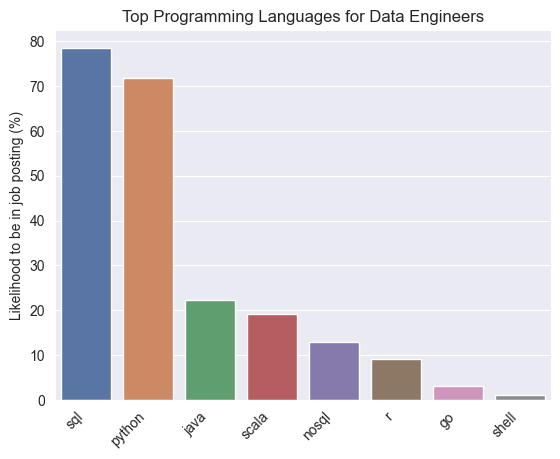

  keywords  counts  percentage
0      sql     656   78.562874
1   python     600   71.856287
2     java     187   22.395210
3    scala     160   19.161677
4    nosql     107   12.814371
5        r      76    9.101796
6       go      26    3.113772
7    shell       9    1.077844


In [6]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")

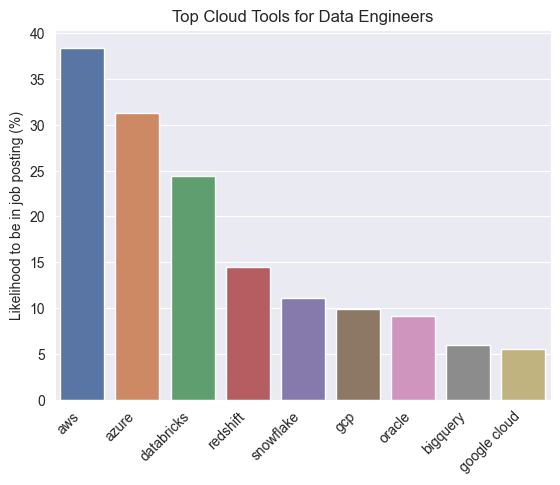

       keywords  counts  percentage
0           aws     321   38.443114
1         azure     261   31.257485
2    databricks     204   24.431138
3      redshift     121   14.491018
4     snowflake      93   11.137725
5           gcp      83    9.940120
6        oracle      76    9.101796
7      bigquery      50    5.988024
8  google cloud      46    5.508982


In [7]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

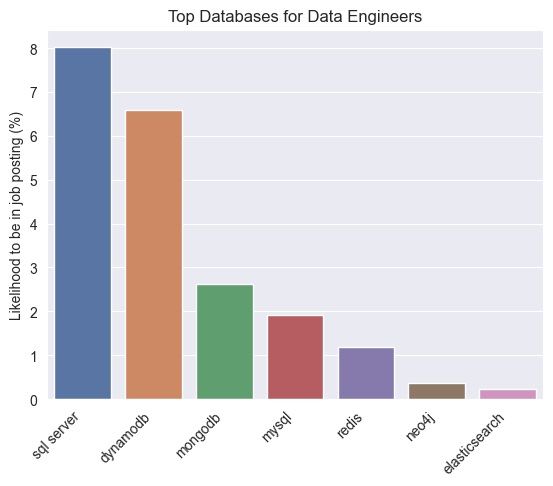

        keywords  counts  percentage
1     sql server      67    8.023952
2       dynamodb      55    6.586826
3        mongodb      22    2.634731
4          mysql      16    1.916168
5          redis      10    1.197605
6          neo4j       3    0.359281
7  elasticsearch       2    0.239521


In [8]:
filtered_keywords(df['job_databases'], databases, title="Top Databases for Data Engineers")

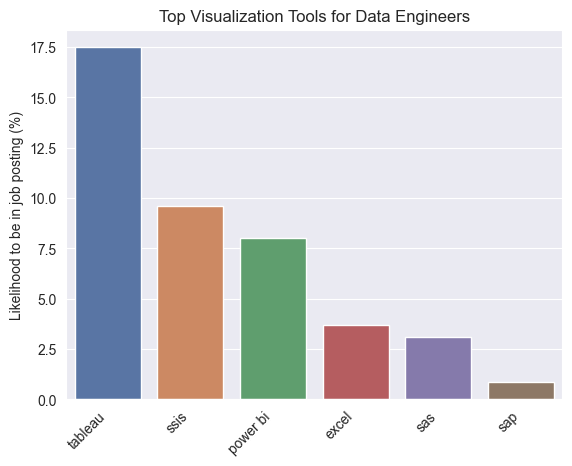

   keywords  counts  percentage
0   tableau     146   17.485030
1      ssis      80    9.580838
2  power bi      67    8.023952
3     excel      31    3.712575
4       sas      26    3.113772
5       sap       7    0.838323


In [9]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")

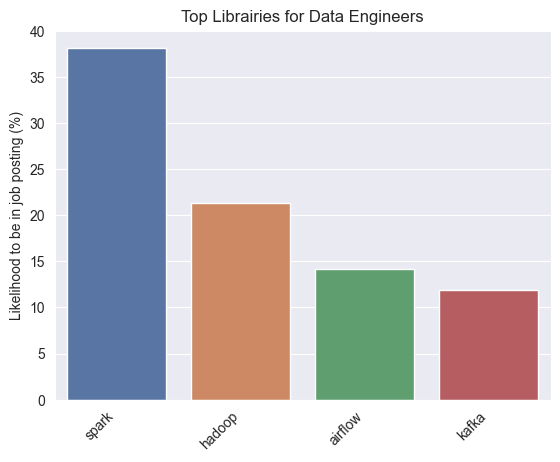

  keywords  counts  percentage
0    spark     319   38.203593
1   hadoop     178   21.317365
2  airflow     118   14.131737
3    kafka      99   11.856287


In [10]:
filtered_keywords(df['job_librairies'], librairies, title="Top Librairies for Data Engineers")

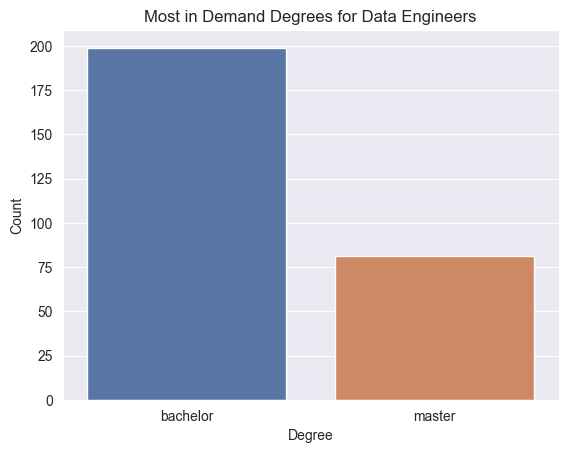

In [11]:
sns.countplot(data=df, x='job_education', palette="deep")

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

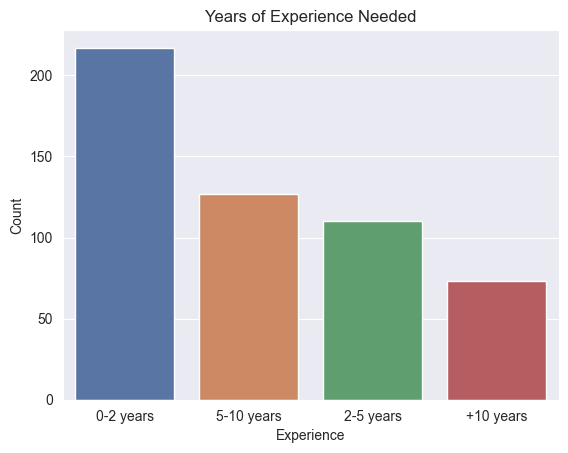

In [12]:
sns.countplot(data=df, x='job_experience', palette="deep", order = df['job_experience'].value_counts().index)

plt.title('Years of Experience Needed')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.show()

Companies that are recruiting Data Engineers the most in Glassdoor (March 2023) 

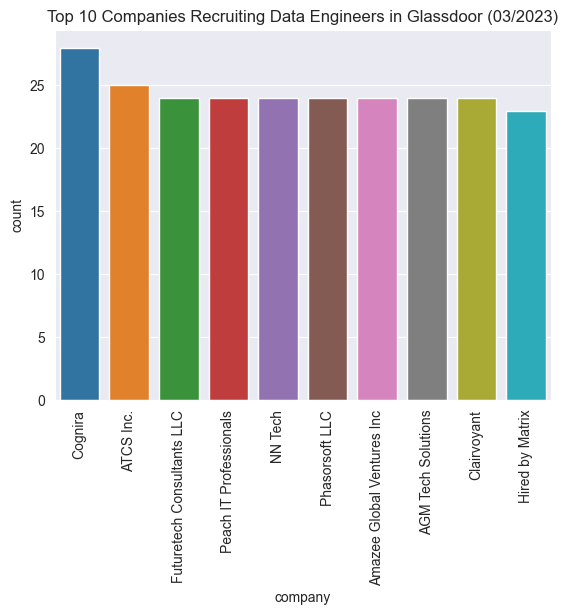

In [13]:
top10 = df['company'].value_counts().head(10)
sns.countplot(x='company', order=top10.index, data=df)
plt.title("Top 10 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

Salary estimate distribution

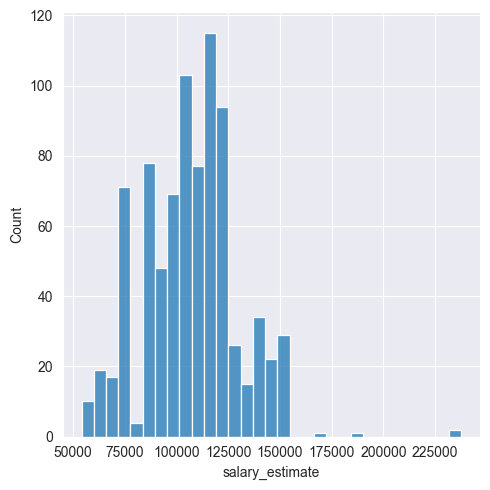

In [14]:
sns.displot(df['salary_estimate'])

<Axes: xlabel='company_rating', ylabel='Count'>

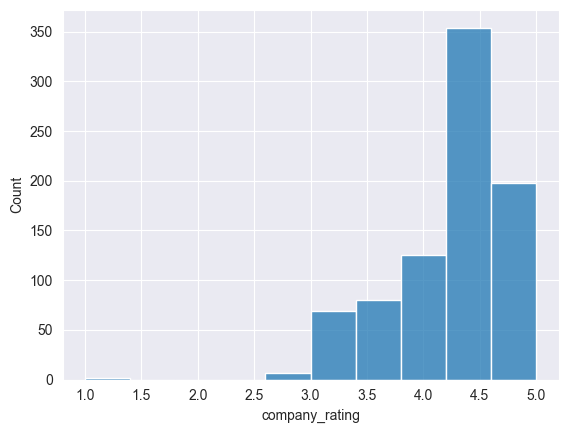

In [15]:
sns.histplot(df['company_rating'], bins=10)

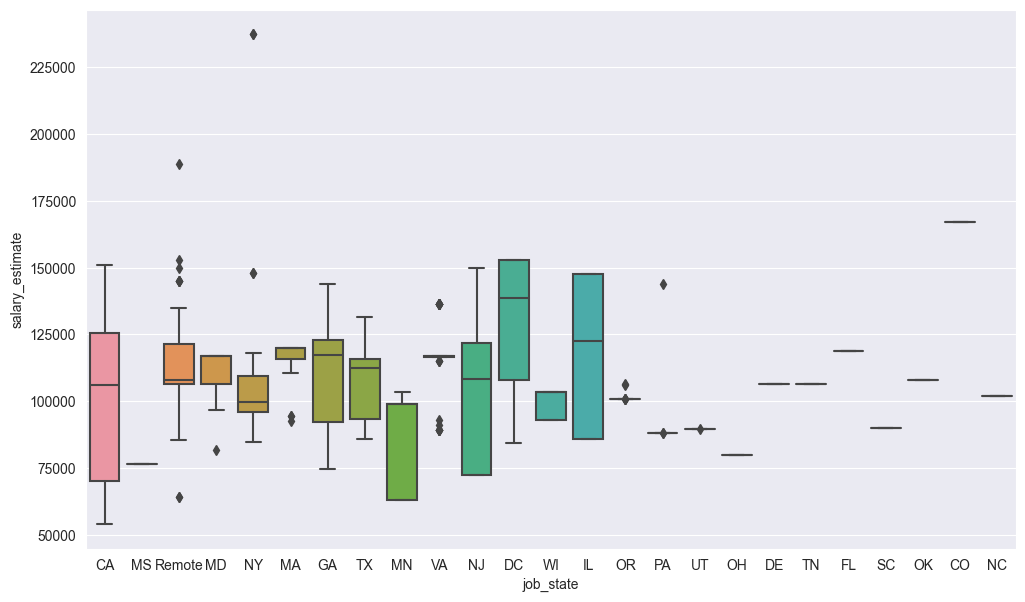

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

Getting rid of the outliers

In [17]:
df = df[df['salary_estimate'] <= 180000]

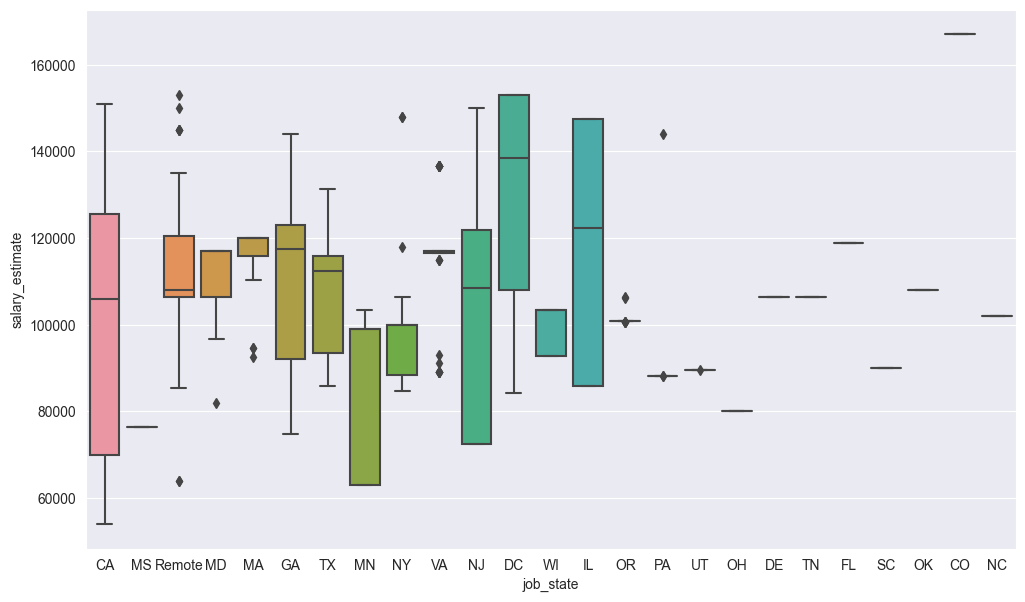

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

In [19]:
df_cat = df[['job_state', 'seniority', 'company_revenue', 'company_age', 'company_industry', 'company_sector', 'company_type', 'company_size']]

graph for job_state: total = 25


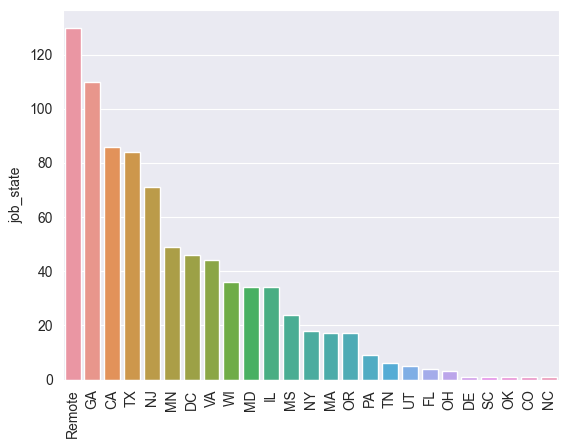

graph for seniority: total = 2


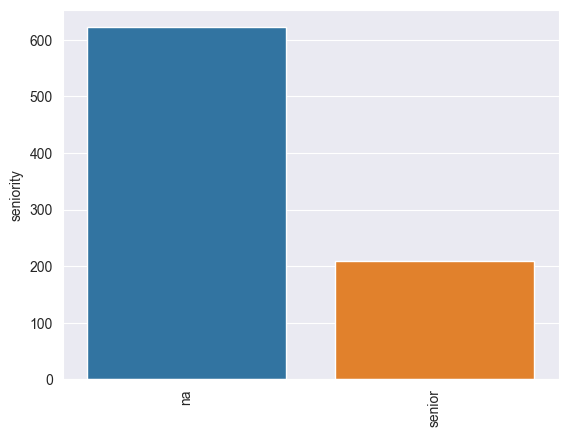

graph for company_revenue: total = 9


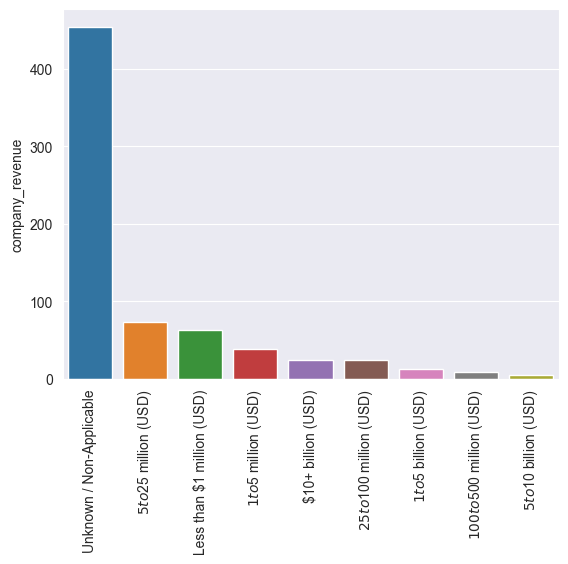

graph for company_age: total = 34


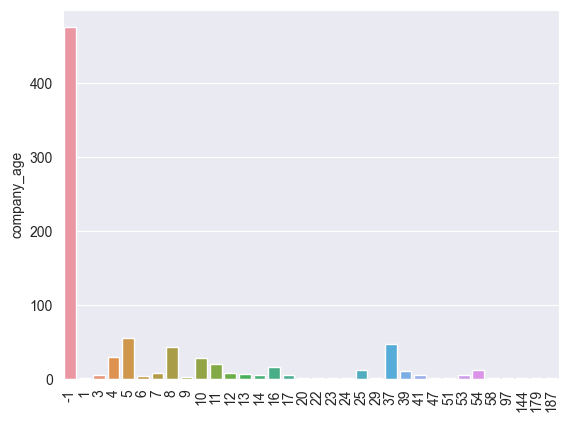

graph for company_industry: total = 25


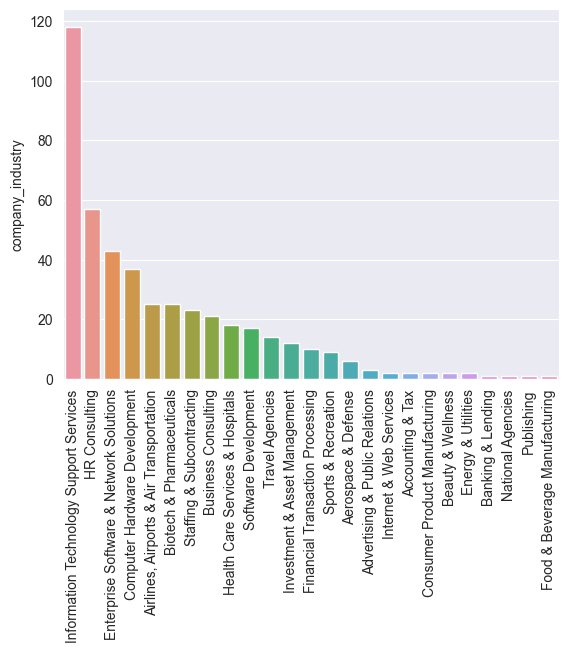

graph for company_sector: total = 15


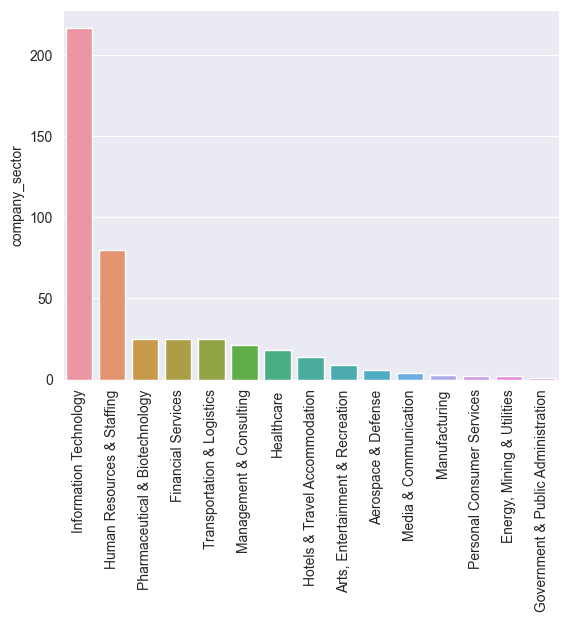

graph for company_type: total = 7


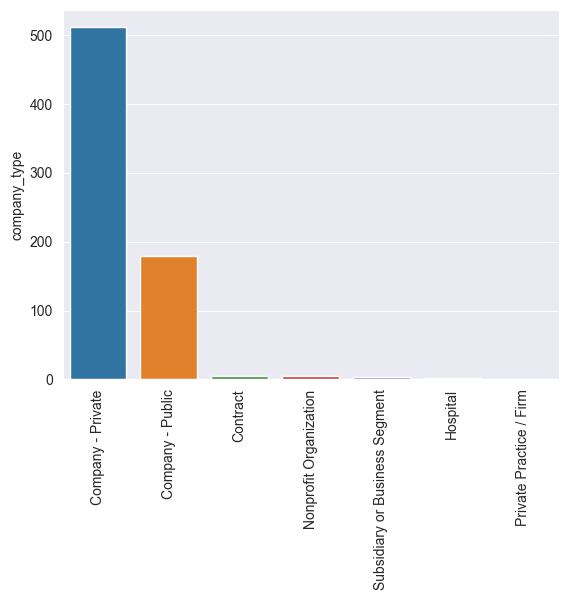

graph for company_size: total = 8


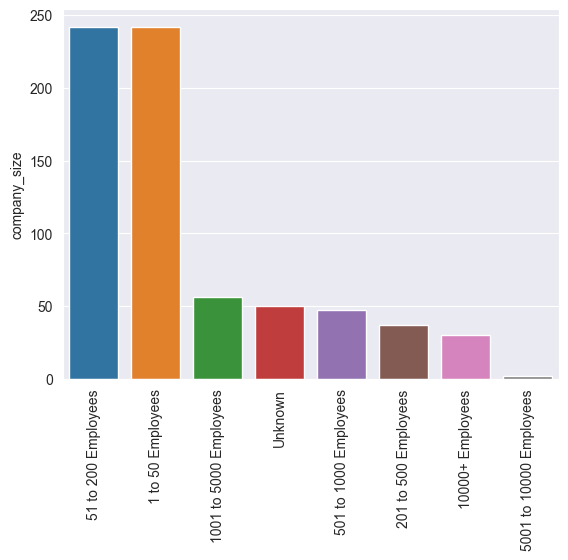

In [20]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Correlation Matrix

<Axes: >

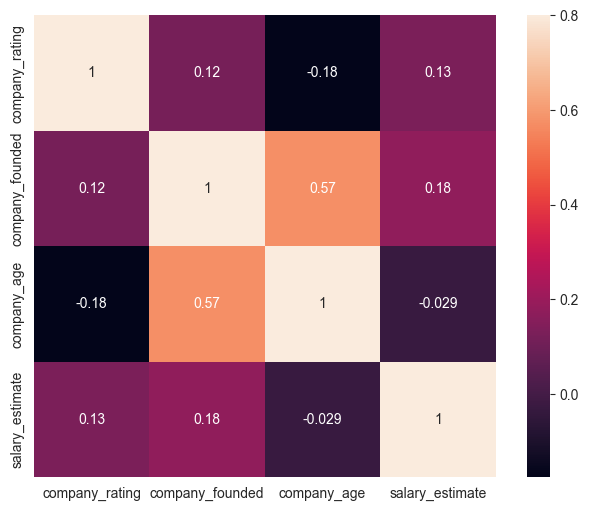

In [21]:
corrmat = df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True)

Let's see how the salary estimate changes based on different features

In [22]:
pd.pivot_table(df, index = 'job_education', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_education,
master,117188.49
bachelor,107722.95


Data Engineers with Master's Degree get paid more

In [23]:
pd.pivot_table(df, index = 'seniority', values = 'salary_estimate').applymap('{:.2f}'.format)

,salary_estimate
seniority,
na,104413.08
senior,112748.21


Senior Data Engineers get paid more

In [24]:
pd.pivot_table(df, index = 'job_state', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_state,
CO,167050.00
DC,128818.13
FL,118866.00
VA,115916.02
IL,115546.09
MA,114323.71
MD,112558.35
GA,110765.33
Remote,108385.77


In [25]:
pd.pivot_table(df, index = 'job_state', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
job_state,
Remote,130
GA,110
CA,86
TX,84
NJ,71
MN,49
DC,46
VA,44
WI,36


CO state have the highest salary estimate but we only have 1 estimate, so we can't take that salary reliably that's why in the model building phase we are gonna drop states with less than 15 record.

In [26]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_industry,
Travel Agencies,147500.00
Banking & Lending,135927.00
HR Consulting,131200.00
Energy & Utilities,128557.50
Biotech & Pharmaceuticals,121240.84
Business Consulting,116109.52
Consumer Product Manufacturing,115797.00
Enterprise Software & Network Solutions,114685.30
Software Development,110879.53


In [27]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
company_industry,
Information Technology Support Services,118
HR Consulting,57
Enterprise Software & Network Solutions,43
Computer Hardware Development,37
"Airlines, Airports & Air Transportation",25
Biotech & Pharmaceuticals,25
Staffing & Subcontracting,23
Business Consulting,21
Health Care Services & Hospitals,18


In [28]:
pd.pivot_table(df, index = 'company_size', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_size,
201 to 500 Employees,116861.19
51 to 200 Employees,110890.47
1 to 50 Employees,110556.75
Unknown,110517.52
10000+ Employees,106954.03
1001 to 5000 Employees,102376.20
5001 to 10000 Employees,88775.00
501 to 1000 Employees,77543.38


In [29]:
pd.pivot_table(df, index = 'company_revenue', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_revenue,
$100 to $500 million (USD),145599.33
$5 to $10 billion (USD),122686.00
$25 to $100 million (USD),120371.25
Less than $1 million (USD),113353.38
$5 to $25 million (USD),111820.34
Unknown / Non-Applicable,106741.96
$10+ billion (USD),105316.76
$1 to $5 billion (USD),97257.69
$1 to $5 million (USD),92741.64


In [30]:
pd.pivot_table(df, index = 'company_type', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_type,
Private Practice / Firm,144000.00
Company - Public,110409.07
Company - Private,107495.29
Subsidiary or Business Segment,102983.33
Hospital,94536.00
Contract,89000.00
Nonprofit Organization,84681.00


Let's build a wordcloud to show relative importance of the words in the job description

In [31]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

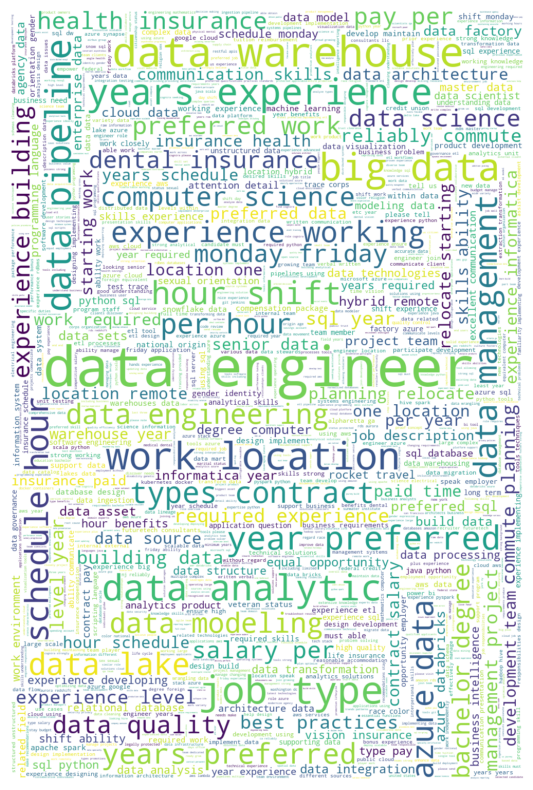

In [33]:
words = " ".join(df['job_description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1000, width=1000, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-eda.csv", index=False)